In [1]:
################## 
# Imports 
################## 


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Basic Linear Regression

1. Generate features x 
2. Generate target y from a linear equation and add some gaussian noise
3. Plot X,Y as a scatter

In [2]:
# Feature
X = np.linspace(0,50,50) 
noise = np.random.normal(0, 20, 50) 

# Equation
y = 2*X +1 + noise

In [3]:
X.shape 

# One dimensional array with 50 elements -> simple list of 50 numbers

# X(50,1) -> 2 dimensional array with 50 rows and 1 column -> Column vector


array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [4]:
X.reshape(50,1) # add the second dimension (columns)

array([[ 0.        ],
       [ 1.02040816],
       [ 2.04081633],
       [ 3.06122449],
       [ 4.08163265],
       [ 5.10204082],
       [ 6.12244898],
       [ 7.14285714],
       [ 8.16326531],
       [ 9.18367347],
       [10.20408163],
       [11.2244898 ],
       [12.24489796],
       [13.26530612],
       [14.28571429],
       [15.30612245],
       [16.32653061],
       [17.34693878],
       [18.36734694],
       [19.3877551 ],
       [20.40816327],
       [21.42857143],
       [22.44897959],
       [23.46938776],
       [24.48979592],
       [25.51020408],
       [26.53061224],
       [27.55102041],
       [28.57142857],
       [29.59183673],
       [30.6122449 ],
       [31.63265306],
       [32.65306122],
       [33.67346939],
       [34.69387755],
       [35.71428571],
       [36.73469388],
       [37.75510204],
       [38.7755102 ],
       [39.79591837],
       [40.81632653],
       [41.83673469],
       [42.85714286],
       [43.87755102],
       [44.89795918],
       [45

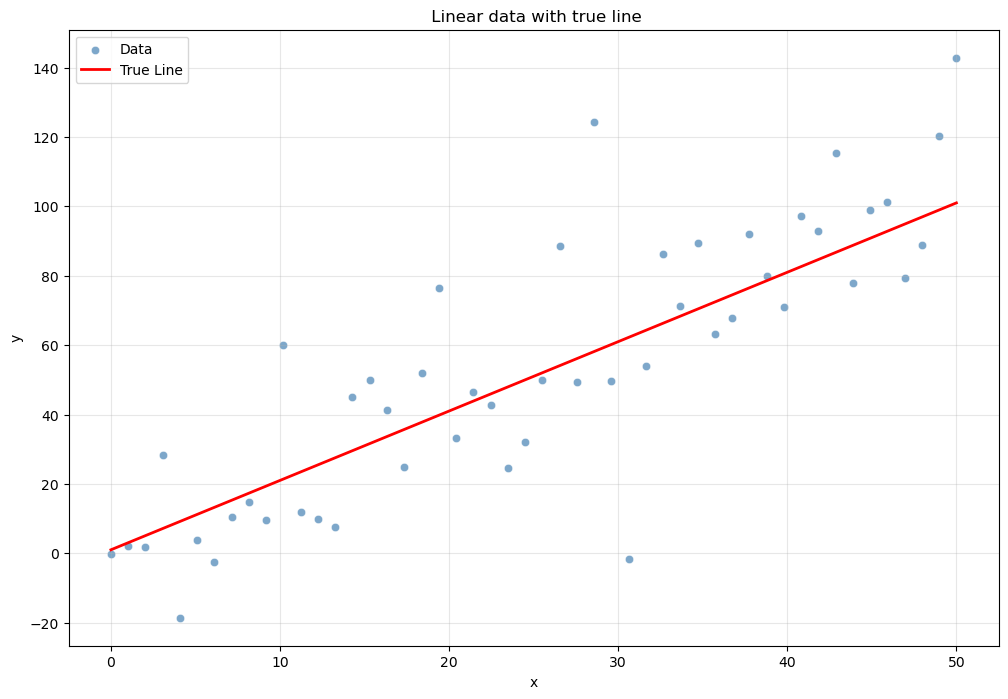

In [5]:
# Plot 

true_line = 2*X+1

plt.figure(figsize= (12,8))

# Data Points
sns.scatterplot(x=X,y=y,color = 'steelblue',alpha = 0.7, label = 'Data')

# True line
plt.plot(X,true_line,color = 'red', linewidth = 2, label = 'True Line')

# Labels and title
plt.xlabel("x")
plt.ylabel('y')
plt.title(' Linear data with true line')
plt.legend()
plt.grid(alpha=0.3)

plt.show()

# Ordinary Least Square

## Linear Regression Model and Beta Hat Derivation

The initial linear regression model is:

$$
y = X \beta + \epsilon
$$

where \( y \) is the observed outcomes vector, \( X \) is the design matrix, \( $beta$ \) is the parameter vector, and \( $\epsilon$ \) is the error term.


### Fitting the linear model

The  \( $\epsilon$ \) is important because real data is not perfectly linear , so it captures everything not explained by \( X \)*\( $\beta$ \). I do not have access to the randomness of \( $\epsilon$ \)  (unkown noise)

this requires the coefficientes \( $beta$ \) such that the error term \( $\epsilon$ \) = y - \( X \)*\( $beta$ \)

So , our model is actually 


\{$\beta$} = \( X \)*\( $\beta$ \).


### Derivation of $\hat{\beta}$

Minimize the residual sum of squares (RSS):

$$
RSS = (y - X \beta)^T (y - X \beta)
$$

Take the derivative with respect to $\beta$ and set to zero:

$$
\frac{\partial}{\partial \beta} RSS = -2 X^T (y - X \beta) = 0
$$

Rearrange:

$$
X^T y = X^T X \beta
$$

Solve for $\hat{\beta}$:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

This is the ordinary least squares estimator.


In [6]:
# First i will create the colum nof interecept (1)
# X = features (with column of interecept)
# y = Goal

y_ols = np.array(y)
X_ols = np.c_[np.ones(len(X)), X.reshape(50,1)]

In [7]:
X

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [8]:
X_ols

array([[ 1.        ,  0.        ],
       [ 1.        ,  1.02040816],
       [ 1.        ,  2.04081633],
       [ 1.        ,  3.06122449],
       [ 1.        ,  4.08163265],
       [ 1.        ,  5.10204082],
       [ 1.        ,  6.12244898],
       [ 1.        ,  7.14285714],
       [ 1.        ,  8.16326531],
       [ 1.        ,  9.18367347],
       [ 1.        , 10.20408163],
       [ 1.        , 11.2244898 ],
       [ 1.        , 12.24489796],
       [ 1.        , 13.26530612],
       [ 1.        , 14.28571429],
       [ 1.        , 15.30612245],
       [ 1.        , 16.32653061],
       [ 1.        , 17.34693878],
       [ 1.        , 18.36734694],
       [ 1.        , 19.3877551 ],
       [ 1.        , 20.40816327],
       [ 1.        , 21.42857143],
       [ 1.        , 22.44897959],
       [ 1.        , 23.46938776],
       [ 1.        , 24.48979592],
       [ 1.        , 25.51020408],
       [ 1.        , 26.53061224],
       [ 1.        , 27.55102041],
       [ 1.        ,

In [12]:
# Solving the OLS

XTX = X_ols.T @ X_ols #
XTX_inv = np.linalg.inv(XTX)
XTy = X_ols.T @ y_ols

# Thus , theta hat will be 
theta_hat = XTX_inv @ XTy
print("Theta_hat (intercepct,slope)",theta_hat)

# Predict


y_hat = X_ols @theta_hat
print('PRedictions y_hat: ', y_hat)

Theta_hat (intercepct,slope) [-2.69147374  2.23415944]
PRedictions y_hat:  [ -2.69147374  -0.41171921   1.86803532   4.14778985   6.42754438
   8.70729891  10.98705344  13.26680797  15.5465625   17.82631703
  20.10607156  22.38582609  24.66558062  26.94533515  29.22508968
  31.50484421  33.78459874  36.06435327  38.34410781  40.62386234
  42.90361687  45.1833714   47.46312593  49.74288046  52.02263499
  54.30238952  56.58214405  58.86189858  61.14165311  63.42140764
  65.70116217  67.9809167   70.26067123  72.54042576  74.82018029
  77.09993482  79.37968935  81.65944388  83.93919841  86.21895294
  88.49870748  90.77846201  93.05821654  95.33797107  97.6177256
  99.89748013 102.17723466 104.45698919 106.73674372 109.01649825]


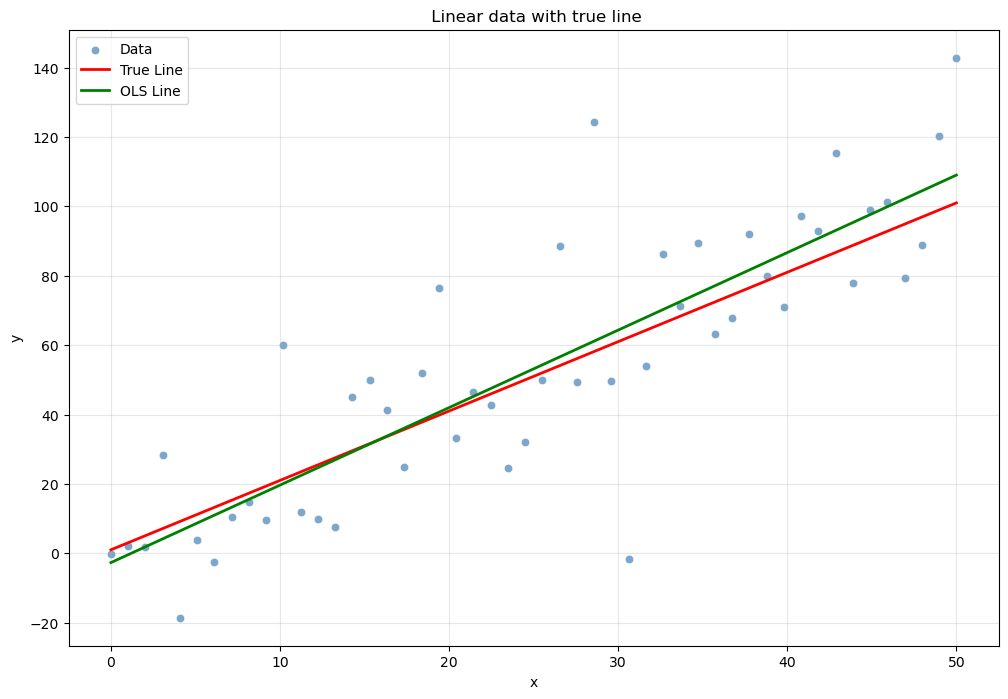

In [13]:
# Plot 

true_line = 2*X+1
OLS_line = y_hat

plt.figure(figsize= (12,8))

# Data Points
sns.scatterplot(x=X,y=y,color = 'steelblue',alpha = 0.7, label = 'Data')

# True line
plt.plot(X,true_line,color = 'red', linewidth = 2, label = 'True Line')
plt.plot(X,y_hat,color = 'green', linewidth = 2, label = 'OLS Line')


# Labels and title
plt.xlabel("x")
plt.ylabel('y')
plt.title(' Linear data with true line')
plt.legend()
plt.grid(alpha=0.3)

plt.show()

# OLS is a closed-form sol and gives the best fit in one step , no iteration. 